<a href="https://colab.research.google.com/github/isha-ingersol/Neural-Computation/blob/main/lab3_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Computation Exercise 3: Perceptron
In this exercise, you will learn the following
* data generation with the random library [edit: synthetic data not actual data]
* define a linear classification model
* python class
* train and test a perceptron

We will first need to import some necessary libraries
* numpy provides a high-performance multidimensional array object, and tools for working with these arrays.
* random implements pseudo-random number generators
* matplotlib is a plotting library
* sklearn.metrics provides method to compute the performance measure of models

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Data Generation

We will generate a dataset for binary classification with the output label being either $+1$ or $-1$. This is achieved by a function `generate_data`.

**Input**: `no_points` is the number of examples in the dataset

**Output**: the dataset for binary classification. `X` is a nx2 matrix and `Y` is a nx1 vector, where n is the number of points.

In [ ]:
def generate_data(no_points):
    X = np.zeros(shape=(no_points, 2))
    Y = np.zeros(shape=no_points)
    for ii in range(no_points):
        X[ii, 0] = random.randint(0,20)
        X[ii, 1] = random.randint(0,20)
        if X[ii, 0]+X[ii, 1] > 20:
            Y[ii] = 1
        else:
            Y[ii] = -1
    return X, Y

We first use `X = np.zeros(shape=(no_points, 2))` to generate a nx2 **zero** matrix X, and `Y = np.zeros(shape=no_points)` to generate a nx1 **zero** vector Y. Then we use a `for` loop to set the value of X and Y.

* `X[ii, 0] = random.randint(0,20)`: the **first** feature of the `ii`-th example is randomly generated from the set {0,1,2,...,19}.
* `X[ii, 1] = random.randint(0,20)`: the **second** feature of the `ii`-th example is randomly generated from the set {0,1,2,...,19}.

We say $x^{(ii)}$ is a positive example if $x^{(ii)}_1+x^{(ii)}_2>20$, and a negative example otherwise. Then, we generate a **linearly separable** dataset.

## Class

Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. The class definitions begin with a `class` keyword, followed by the class name and a colon.

All classes have a function called __init__(), which is always executed when the class is being initiated.

`Example`: Create a class named Person, use the __init__() function to assign values for name and age:

In [ ]:
class Person():
  def __init__(self, name, age):
    self.name = name
    self.age = age

We can create new object instances (instantiation) of that class. The procedure to create an object is similar to a function call.

In [ ]:
p1 = Person("John", 36)

print(p1.name)
print(p1.age)

John
36


In this example, we create an object p1, and assign the name attribute with "John", the age attribute with 36.

We can create some methods for the class. Here let us create a method in the Person class (Insert a function that prints a greeting, and execute it on the p1 object:):

In [ ]:
class Person():

  def __init__(self, name, age):
    self.name = name
    self.age = age

  def myfunc(self):
    print("Hello my name is " + self.name)

p1 = Person("John", 36)
p1.myfunc()

Hello my name is John


The `self` parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.

More details about class in python can be found
[**here**](https://docs.python.org/3.5/tutorial/classes.html)

## Perceptron Algorithm
### Perceptron
Recall a perceptron takes the form
$$\mathbf{x}\mapsto \text{sgn}(\mathbf{w}^\top\mathbf{x}+b),$$
where $\mathbf{w}$ is the weight vector and $b$ is the bias. Here $\text{sgn}(a)$ returns the sign of $a$.  Then it predicts $\mathbf{x}$ to be a positive example if $\mathbf{w}^\top\mathbf{x}+b>0$ and negative otherwise. According to the prediction scheme, this model misclassifies an example $(\mathbf{x},y)$ if $y(\mathbf{w}^\top\mathbf{x}+b)\leq0$.

### Perceptron Algorithm
The perceptron algorithm tries to find $\mathbf{w}$ and $b$. The basic idea is to traverse the dataset and update the model if it encouters a misclassified example. Suppose $(\mathbf{x},y)$ is a misclassified example, then it updates the model by
$$
\mathbf{w}\gets \mathbf{w}+y\mathbf{x}\quad b\gets b+y.
$$

[Edit: This is not done through gradient descent or anything. It is just done through human intuition.]

It is then clear that
$$
y(b+y+(\mathbf{w}+y\mathbf{x})^\top\mathbf{x})=yb+y\mathbf{w}^\top\mathbf{x}+y^2+y^2\mathbf{x}^\top\mathbf{x}>
y(b+\mathbf{w}^\top\mathbf{x}).
$$
That is, after an update the perceptron is more likely to classify correctly the example $(\mathbf{x},y)$.

We define a class `perceptron` to implement the *perceptron* algorithm.
* `__init__()` is an initialization method. It allows for customized initialization of objects. It has two additional arguments: b is the bias and max_iter is the maximal number of iterations.
* `train(self, X, Y)` is the perceptron algorithm to train a perceptron based on the input data matrix X (nxd, each row represents an example) and the output label vector Y (nx1).
* `classify_element(self, x_elem)` returns the predicted label of the perceptron on a single example with the input `x_elem`
* `classify(self, X)` returns the predicted labels of the perceptron on a set of examples with the input matrix `X`

We request you to complete the following construction of the class `Perceptron`. In particular, we request you to complete the functions `train` , `classify_element` and `classify`.

In [ ]:
class Perceptron():
    """
    Class for performing Perceptron.
    X is the input array with n rows (no_examples) and d columns (no_features)
    Y is a vector containing elements which indicate the class
        (1 for positive class, -1 for negative class)
    w is the weight vector (d dimensional vector)
    b is the bias value
    """
    def __init__(self, b = 0, max_iter = 1000):
    # def __init__() — initialization function aka. constructor
        # we initialize an instance
        self.max_iter = max_iter
        self.w = []
        self.b = 0
        self.no_examples = 0
        self.no_features = 0

    def train(self, X, Y):
        '''
        This function applies the perceptron algorithm to train a model w based on X and Y.
        It changes both w and b of the class.
        '''
        # we set the number of examples and the number of features according to the matrix X
        self.no_examples, self.no_features = np.shape(X)
        # we initialize the weight vector as the zero vector
        self.w = np.zeros(self.no_features)

        # we only run a limited number of iterations
        for ii in range(0, self.max_iter):
            # at the begining of each iteration, we set the w_updated to be false (meaning we have not yet found misclassified example)
            w_updated = False
            # we traverse all the training examples
            for jj in range(0, self.no_examples):
                # To do: Insert your code to finish the update of the model by the perceptron algorithm
                x_elem = X[jj]
                y_elem = Y[jj]
                if y_elem * (self.w.dot(x_elem) + self.b) <= 0:
                    self.w += y_elem * x_elem
                    self.b += y_elem
                    w_updated = True

                # # alternate method:-
                # if Y[jj] * (np.dot(self.w, X[jj,:]) + b) <= 0:
                #     # change only in case of a mistake by the model
                #     self.w += Y[jj] * X[jj,:]
                #     self.b += Y[jj]
                #     w_updated = True

            # if we do not find any misclassified example, we can return the model
            if not w_updated:
                print("Convergence reached in %i iterations." % ii)
                break
        # after finishing the iterations we can still find a misclassified example
        if w_updated:
            print(
            """
            WARNING: convergence not reached in %i iterations.
            Either dataset is not linearly separable,
            or max_iter should be increased
            """ % self.max_iter
                )
    # To do: insert your code to complete the definition of the function classify_element
    def classify_element(self, x_elem):
        '''
        This function returns the predicted label of the perceptron on an input x_elem
        You may require to use np.sign() function, which returns the sign of a number
        Input:
            x_elem: an input feature vector
        Output:
            return the predictred label of the model (indicated by w and b) on x_elem
        '''
        return np.sign(self.w.dot(x_elem) + self.b)

        # # Alternate method:
        # return np.sign(np.dot(self.w,x_elem) + self.b)

    # To do: insert your code to complete the definition of the function classify on a data matrix (n examples)
    def classify(self, X):
        '''
        This function returns the predicted labels of the perceptron on an input matrix X
        Input:
            X: a data matrix with n rows (no_examples) and d columns (no_features)
        Output:
            return the vector. i-th entry is the predicted label on the i-th example
        '''
        predicted_Y = np.sign(np.dot(X, self.w) + self.b)
        # there are two ways to do this (as mentioned in the solution file)

        # we return the output vector
        return predicted_Y

## Experiments
### Data Generation
We first generate a dataset with $100$ examples by using the function `generate_data`.

In [ ]:
X, Y = generate_data(100) # binary classified, linearly separated data

### Visualization of the dataset
We visualise the dataset using a `scatter` plot using the scatter function in the `matplotlib.pylot` module.  To this aim, we use **list comprehension** to find the indices for positive and negative examples.

List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.

**Syntax**

newlist = \[*expression* for *item* in *iterable* if condition == True\]
* First is the expression we’d like to carry out. *expression* inside the square brackets.
* Second is the object that the expression will work on. *item* inside the square brackets.
* Third, we need an iterable list of objects to build our new list from. *iterable* inside the square brackets.
* *condition* is like a filter that only accepts the items that valuate to True.

More details can be found at [**list comprehension**](https://www.w3schools.com/python/python_lists_comprehension.asp)

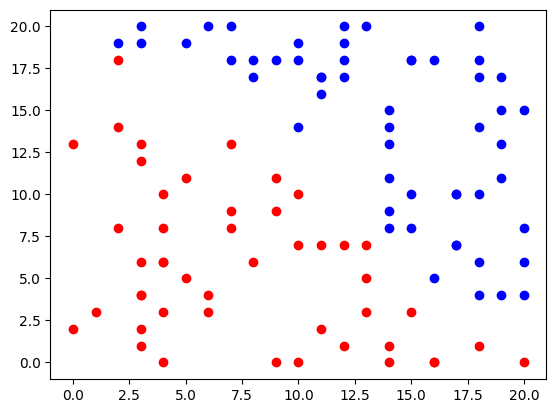

In [ ]:
# TO Do: Insert your code to find the indices for positive examples
idx_pos = [i for i in range(len(Y)) if Y[i] == 1] # Python's way of List Comprehensions
# TO Do: Insert your code to find the indices for negative examples
idx_neg = [i for i in range(len(Y)) if Y[i] == -1]
# make a scatter plot
plt.scatter(X[idx_pos, 0], X[idx_pos, 1], color='blue')
plt.scatter(X[idx_neg, 0], X[idx_neg, 1], color='red')
plt.show()

### Train
We then train the model by the perceptron algorithm on the dataset X, Y.
* p is an **instance** of the class `perceptron`
* p.train(X, Y) applies the train algorithm to (X,Y) and sets the weight vector and bias in the instance p.
* `accuracy_score`  return the fraction of correctly classified samples. The syntax is
`accuracy_score(y_true, y_pred)`
The details can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
# Create an instance p
p = Perceptron()
# applies the train algorithm to (X,Y) and sets the weight vector and bias
p.train(X, Y)
# To Do: Insert your code to get the predicted output on the training set
predicted_Y = p.classify(X)
# TO Do: Insert your code to get the accuracy on the training set
acc_tr = accuracy_score(Y, predicted_Y)
print(acc_tr)

Convergence reached in 26 iterations.
1.0


### Test
We evaluate the performance of the algorithm on a test dataset X_test, Y_test

In [ ]:
# we first generate a new dataset
X_test, Y_test = generate_data(100)
# To Do: Insert your code to get the predicted output on the test set
predicted_Y_test = p.classify(X_test)
# TO Do: Insert your code to get the accuracy on the test set
acc = accuracy_score(Y_test, predicted_Y_test)
print(acc)

1.0


### Visulation of the perceptron

Note that the hyperplane is the points $\mathbf{x}$ such that
$$
\mathbf{w}^\top \mathbf{x}+b=0\Longleftrightarrow w_1x_1+w_2x_2+b=0.
$$
If $w_2\neq0$, this means
$$
x_2 = (-b - w_1x_1) / w_2.
$$
We now plot the hyperplane. To this aim, we need to generate points in the hyperplane. The idea is to first generate the first coordinate of these points and then determine the second coordinates according to the above equation.

We first use the `arange` function to generate points in the region $(0,20)$.
The command `numpy.arange(start, stop, step, dtype)` creates the instance of ndarray with evenly spaced values and returns the reference to it.
* start: start of an interval
* stop: end of the interval. The interval does not contain a stop value, except when a step is not an integer and floating-
* step: spacing between values.
* dtype: the type of the output array.

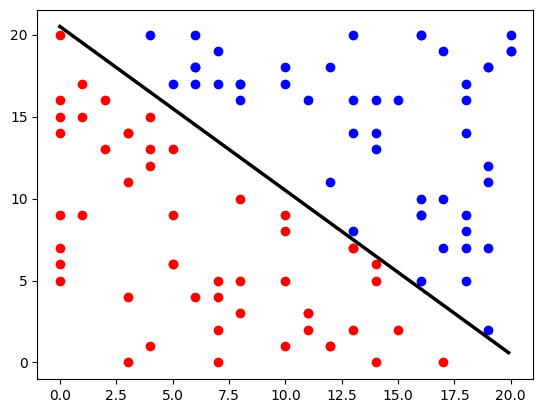

In [ ]:
# we get an array of the first feature
x1 = np.arange(0, 20, 0.1)
# bias
b = p.b
# weight vector
w = p.w
# we now use list comprehension to generate the array of the second feature
# To do: generate the second features for the hyperplane, i.e., (X1[i], X2[i]) is an point in the hyperplane for the perceptron
x2 = [(-b - w[0] * x1[i]) / w[1] for i in range(len(x1))]

plt.scatter(X[idx_pos, 0], X[idx_pos, 1], color='blue')
plt.scatter(X[idx_neg, 0], X[idx_neg, 1], color='red')
# plot the hyperplane corresponding to the perceptron
plt.plot(x1, x2, color="black", linewidth=2.5, linestyle="-")
plt.show()

As you can see, the perceptron found by the algorithm sepearates well the positive examples from negative examples!